In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

for distance 2 cm
the theoretical Radiant Intensity =  95.90045926554673 mW/sr
the measured Radiant Intensity =  48.6849718596732 mW/sr
for distance 5 cm
the theoretical Radiant Intensity =  96.61692674939627 mW/sr
the measured Radiant Intensity =  38.61920190690843 mW/sr
for distance 10 cm
the theoretical Radiant Intensity =  96.72014765649526 mW/sr
the measured Radiant Intensity =  49.540076679444255 mW/sr
for distance 15 cm
the theoretical Radiant Intensity =  96.73928667206894 mW/sr
the measured Radiant Intensity =  33.167112294822196 mW/sr
for distance 30 cm
the theoretical Radiant Intensity =  96.75077369131752 mW/sr
the measured Radiant Intensity =  38.755850026780536 mW/sr


Text(0.5, 1.0, 'intensity/nm')

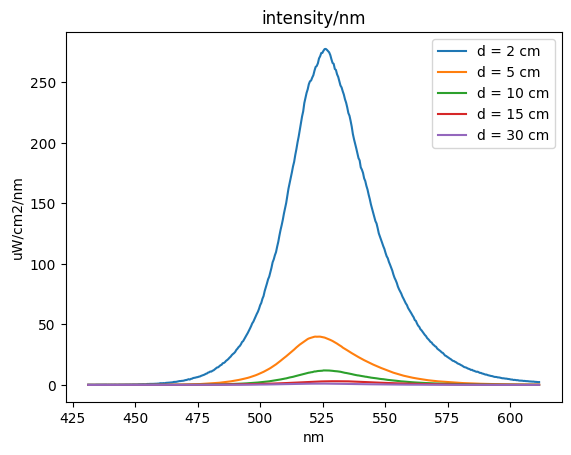

In [2]:
d = [2,5,10,15,30]

I_th = []
I_pr = []

for dval in d:
    # Reading the data from the file
    filename = f"data\\520nm_300mA_{dval}cm_1LED.txt"
    # Initialize a list to store the data
    wavelen = []
    ints_nm = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            wavelen.append(float(parts[0]))
            ints_nm.append(float(parts[1]))
    fro = 500
    to = 900
    plt.plot(wavelen[fro:to],ints_nm[fro:to], label = f"d = {dval} cm")

    #given distance and radius of the sensing unit
    d = dval #cm
    r = 0.39/2 #cm
    A = np.pi*r**2

    # steradian
    SR = A/d**2
    ang = np.rad2deg(np.arctan(r/d))

    #to integrate over a specific angle range
    ele = np.deg2rad(np.linspace(-ang,ang,180)) # defining theta
    azi = np.deg2rad(np.linspace(-ang,ang,180)) # defining theta

    Ir = np.zeros([len(ele),len(azi)])

    k = (2/np.pi)**2

    for i in range(len(ele)):
        for j in range(len(azi)):
            Ir[i][j] = -k*(ele[i]**2+azi[j]**2) + 1

    # Integrate over azimuth first, then elevation
    integral_azi = simps(Ir, azi, axis=1)  # Integrate over azi for each ele
    P_ang = simps(integral_azi, ele)  # Integrate over ele

    scl = np.pi**2/3
    P_t = P_ang*250/scl #mW
    Ir_SR = P_t/SR

    I = simps(ints_nm, wavelen)
    P = I*A*1e-3 #mW
    #print("total power at 10 cm = ", P, "mW")

    Ir_SR_pr = P/SR
    print(f"for distance {dval} cm")
    print("the theoretical Radiant Intensity = ",Ir_SR, "mW/sr")
    I_th.append(Ir_SR)
    print("the measured Radiant Intensity = ",Ir_SR_pr, "mW/sr")
    I_pr.append(Ir_SR_pr)

plt.ylabel("uW/cm2/nm")
plt.xlabel("nm")
plt.legend()
plt.title("intensity/nm")